In [138]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import dabest

In [139]:
file_name_properties = "Y:/Olya/Imaging_data_flow/2023/MV2_Promocell/KLF4/KLF4_merged_file_dot.csv"
output_folder = "T:/02_Projects/Manuscript_Goldilocks_HHT/Figure_3/KLF4_size_shape/"
properties_df = pd.read_csv(file_name_properties)#, sep=";")
properties_df

,filename,short_name,marker_mean_expression_nuc,marker_mean_expression_cyt,nuc_to_cytosol_ratio,flow
0,230302_MV2_4h_static-02(1),siCTRL_static,108.072495,51.995258,2.078507,static
1,230302_MV2_4h_static-02(1),siCTRL_static,48.864231,20.153032,2.424659,static
2,230302_MV2_4h_static-02(1),siCTRL_static,64.530357,19.700611,3.275551,static
3,230302_MV2_4h_static-02(1),siCTRL_static,77.801849,20.089123,3.872835,static
4,230302_MV2_4h_static-02(1),siCTRL_static,54.337254,17.077110,3.181876,static
...,...,...,...,...,...,...
32329,230302_siAlk1_MV2_4h_static-03(17),siAlk1_static,65.476593,22.381172,2.925521,static
32330,230302_siAlk1_MV2_4h_static-03(17),siAlk1_static,75.198517,21.955336,3.425068,static
32331,230302_siAlk1_MV2_4h_static-03(17),siAlk1_static,76.106262,26.221907,2.902392,static
32332,230302_siAlk1_MV2_4h_static-03(17),siAlk1_static,91.853722,31.399187,2.925353,static


In [140]:
print(properties_df.columns)

Index(['filename', 'short_name', 'marker_mean_expression_nuc',
       'marker_mean_expression_cyt', 'nuc_to_cytosol_ratio', 'flow'],
      dtype='object')


In [141]:
properties_df["nuc_to_cytosol_ratio"].unique() #change based on analyzed feature. can also be for cell area/elongation/orientation;
#properties_df["Group"].unique

array([2.07850673, 2.424659  , 3.27555105, ..., 2.90239239, 2.92535349,
       2.25284436])

In [142]:
#only in case of KLF4/pSMAD159 analysis

properties_df["nuc_to_cytosol_ratio"] = properties_df["marker_mean_expression_nuc"]/properties_df["marker_mean_expression_cyt"]
properties_df["nuc_to_cytosol_ratio"]

0        2.078507
1        2.424659
2        3.275551
3        3.872835
4        3.181876
           ...   
32329    2.925521
32330    3.425068
32331    2.902392
32332    2.925353
32333    2.252844
Name: nuc_to_cytosol_ratio, Length: 32334, dtype: float64

In [143]:
properties_mean_df = properties_df.groupby("short_name").mean().reset_index()

C:\Users\ooppenh\AppData\Local\Temp\2\ipykernel_12536\2409064216.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  properties_mean_df = properties_df.groupby("short_name").mean().reset_index()


In [144]:
properties_mean_df = pd.DataFrame()

index = 0
for img_name in properties_df["short_name"].unique():

    properties_img_df = properties_df[properties_df["short_name"]==img_name]
    properties_mean_df.at[index,"short_name"] = img_name
    #properties_mean_df.at[index,"Vessel_Density_CD31/COL4"] = properties_img_df["Vessel_Density_CD31/COL4"].iloc[0]
    #properties_mean_df.at[index,"time_point"] = properties_img_df["time_point"].iloc[0]
    #properties_mean_df = properties_mean_df.loc[properties_mean_df['Group'] == 'SMAD4_KO']
    properties_mean_df.at[index,"nuc_to_cytosol_ratio"] = properties_img_df["nuc_to_cytosol_ratio"].mean()
    #properties_mean_df.at[index,"cell_major_to_minor_ratio"] = properties_img_df["cell_major_to_minor_ratio"].mean()
    #properties_mean_df.at[index,"Vessel_Density_CD31/COL4"] = properties_img_df["Vessel_Density_CD31/COL4"].mean()
    #properties_mean_df.at[index,"nuc_to_cytosol_ratio_std"] = properties_img_df["nuc_to_cytosol_ratio"].std()
    index +=1
    properties_mean_df.reset_index(drop=True, inplace=True)
properties_mean_df

,short_name,nuc_to_cytosol_ratio
0,siCTRL_static,3.879241
1,siCTRL_4h,6.632949
2,siCTRL_16h,5.453780
3,siAlk1_static,3.956836
4,siAlk1_4h,5.041346
5,siAlk1_16h,5.227323
6,siSMAD4_static,4.273450
7,siSMAD4_4h,7.211560
8,siSMAD4_16h,8.128630


In [133]:
#outlier test (also [126],[115])

from scipy.stats import zscore

df = pd.DataFrame(properties_df)
Smad4_df = df[df['short_name'] == 'SMAD4_KO']
Smad4_df['z_score'] = zscore(Smad4_df['Vessel_Density_CD31/COL4'])
outliers = Smad4_df[(Smad4_df['z_score'] > 3) | (Smad4_df['z_score'] < -3)]
outlier_indices = outliers.index
print(outliers)
print(outlier_indices)

df_no_outliers = df.drop(outlier_indices)
#print("DataFrame without outliers:\n", df_no_outliers)

Empty DataFrame
Columns: [Image, Group, Branching_Points_Density_CD31/COL4, Vessel_Density_CD31/COL4, Mean_Branch_Length, Mean_Vessel_Radius, Branching Points, Regression_events, Regression_100_BPs, z_score]
Index: []
Int64Index([], dtype='int64')


C:\Users\ooppenh\AppData\Local\Temp\2\ipykernel_12536\233992537.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Smad4_df['z_score'] = zscore(Smad4_df['Vessel_Density_CD31/COL4'])


In [126]:
Alk1_df = df[df['Group'] == 'ALK1_KO']
Alk1_df['z_score'] = zscore(Alk1_df['Branching_Points_Density_CD31/COL4'])
outliers = Alk1_df[(Alk1_df['z_score'] > 3) | (Alk1_df['z_score'] < -3)]
print(outliers)

Empty DataFrame
Columns: [Image, Group, Branching_Points_Density_CD31/COL4, Vessel_Density_CD31/COL4, Mean_Branch_Length, Mean_Vessel_Radius, Branching Points, Regression_events, Regression_100_BPs, z_score]
Index: []


In [115]:
ctrl_df = df[df['Group'] == 'CTRL_Alk1']
ctrl_df['z_score'] = zscore(ctrl_df['Regression_100_BPs'])
outliers = ctrl_df[(ctrl_df['z_score'] > 3) | (ctrl_df['z_score'] < -3)]
print(outliers)

Empty DataFrame
Columns: [Image, Group, Branching_Points_Density_CD31/COL4, Vessel_Density_CD31/COL4, Mean_Branch_Length, Mean_Vessel_Radius, Branching Points, Regression_events, Regression_100_BPs, z_score]
Index: []


C:\Users\ooppenh\AppData\Local\Temp\2\ipykernel_12536\1830919089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctrl_df['z_score'] = zscore(ctrl_df['Regression_100_BPs'])


C:\Users\ooppenh\AppData\Roaming\Python\Python38\site-packages\dabest\plot_tools.py:1232: UserWarning: 99.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
C:\Users\ooppenh\AppData\Roaming\Python\Python38\site-packages\dabest\plot_tools.py:1232: UserWarning: 98.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
C:\Users\ooppenh\AppData\Roaming\Python\Python38\site-packages\dabest\plot_tools.py:1232: UserWarning: 99.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
C:\Users\ooppenh\AppData\Roaming\Python\Python38\site-packages\dabest\plot_tools.py:1232: UserWarning: 99.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
C:\Users\ooppenh\AppData\Roaming\Python\Python38\site-packages\dabest\plot_tools.py:1232: UserWarning: 99.3% of the points cannot be placed. You

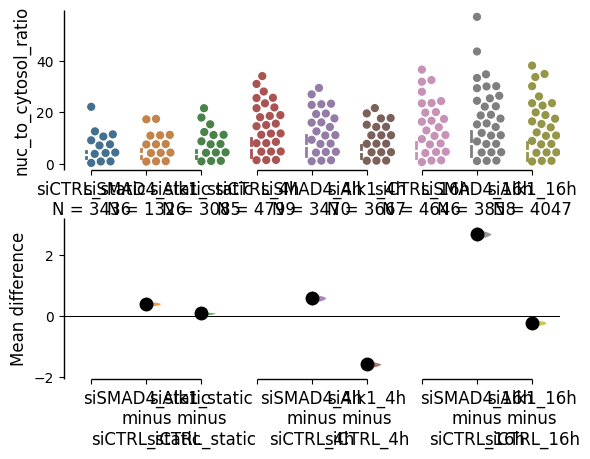

In [145]:
#DABEST plot for grouped analysis

f, axx = plt.subplots(nrows=1, ncols=1, gridspec_kw={'wspace': 0.25}) 

properties_dabest = dabest.load(data = properties_df, x="short_name", y="nuc_to_cytosol_ratio", 
                          #idx=('ctrl','Alk1 KO','Smad4 KO'))
#properties_dabest = dabest.load(data = df_no_outliers, x="condition_short", y="perc75th_AV", 
                          idx=(('siCTRL_static','siSMAD4_static','siAlk1_static'), ('siCTRL_4h', 'siSMAD4_4h', 'siAlk1_4h') , ('siCTRL_16h', 'siSMAD4_16h', 'siAlk1_16h')))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax=axx);
test.savefig(output_folder + "dabest_stats_result_KLF4_1.pdf")



In [ ]:
#DABEST plot for analysis relative to single control

f, axx = plt.subplots(nrows=1, ncols=1, figsize=(40,15))

properties_dabest = dabest.load(data=properties_df, x="Group", y="Branching_Points_Density_CD31/COL4",
                          idx=(('CTRL_SMAD4','siSMAD4_static','siAlk1_static'), ('CTRL_Alk1', 'Alk1_KO')))

# Produce a Cumming estimation plot.
test = properties_dabest.mean_diff.plot(ax=axx);
#test.savefig(output_folder + "dabest_stats_result_BPD_ratio.pdf")

In [ ]:
#box+swarm plot

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))
sns.boxplot(data = properties_df, y ="Branching_Points_Density_CD31/COL4", x = "Group", width=0.5, color="white")#, showfliers=True)
sns.swarmplot(data = properties_df, y ="Branching_Points_Density_CD31/COL4", x = "Group", size=3, dodge =True)
#sns.scatterplot(data = properties_mean_df, y ="cell_area_um^2", x = "condition") #, showfliers=False)


#fig.savefig(output_folder + "scatterplot.pdf")
#fig.savefig(output_folder + "pSMAD159_boxplot_18dyn_dodge.pdf")
#fig.savefig(output_folder + "stripplot.pdf")

In [137]:
#generates csv file with statistical analysis data

properties_dabest = dabest.load(data=properties_df, x="Group", y="Vessel_Density_CD31/COL4",
                         # idx=(('CTRL_SMAD4','SMAD4_KO'), ('CTRL_Alk1', 'Alk1_KO')) )
                          idx=('SMAD4_KO','Alk1_KO'))  

mean_diff = properties_dabest.mean_diff.results
mean_diff.to_csv(output_folder + "statistics_VD_ratio_2.csv")
mean_diff

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,...,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,SMAD4_KO,Alk1_KO,10,8,mean difference,None,0.196271,95,-0.050001,0.496026,...,"[0.12660121450000006, -0.029047026275, 0.18241...",0.191,5000,"[0.021983913612323817, 0.021972405295709478, 0...",0.209229,-1.333597,0.178276,-1.40796,0.172814,24.0
